In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('olympics/athlete_events.csv')

In [4]:
df.shape

(271116, 15)

In [5]:
df.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [6]:
df = df[['Name','Sex','Age','Height','Weight','Team','Season','Sport','Medal','Year']]

In [7]:
df['Medal'].fillna('XX',inplace=True)

In [8]:
df.shape

(271116, 10)

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(206165, 10)

In [11]:
df = df[df.Season=='Summer']

In [12]:
df.reset_index(inplace=True,drop=True)

In [13]:
df.head()

Name Sex   Age  Height  Weight     Team  Season       Sport  \
0           A Dijiang   M  24.0   180.0    80.0    China  Summer  Basketball   
1            A Lamusi   M  23.0   170.0    60.0    China  Summer        Judo   
2   Jyri Tapani Aalto   M  31.0   172.0    70.0  Finland  Summer   Badminton   
3  Minna Maarit Aalto   F  30.0   159.0    55.5  Finland  Summer     Sailing   
4  Minna Maarit Aalto   F  34.0   159.0    55.5  Finland  Summer     Sailing   

  Medal  Year  
0    XX  1992  
1    XX  2012  
2    XX  2000  
3    XX  1996  
4    XX  2000

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [15]:
varc=['Age','Height','Weight']

In [16]:
X = df[varc].copy()

In [17]:
sc = StandardScaler()
mm = MinMaxScaler()
sc.fit(X)
mm.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [18]:
Xs = pd.DataFrame(sc.transform(X),columns=varc)
Xm = pd.DataFrame(mm.transform(X),columns=varc)

In [19]:
pca = PCA(n_components=2)
mds = MDS(n_components=2)

In [21]:
Xp = pd.DataFrame(pca.fit_transform(Xs),columns=['p1','p2'])
Xmd = pd.DataFrame(pca.fit_transform(Xs.sample(frac=0.1)),
                  columns=['d1','d2'])

In [22]:
pca.explained_variance_ratio_.cumsum()

array([0.62102398, 0.93256021])

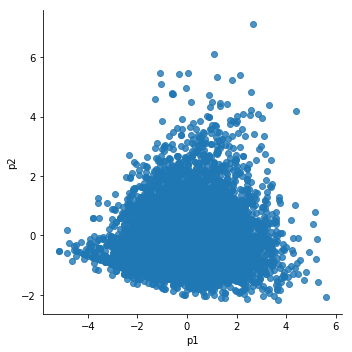

In [23]:
sns.lmplot(data=Xp.sample(frac=0.05),x='p1',y='p2',fit_reg=False)

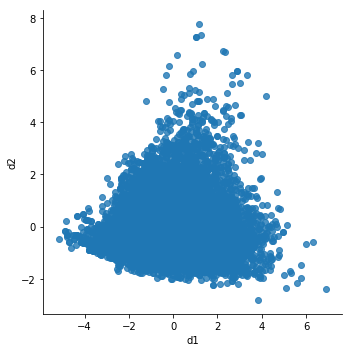

In [24]:
sns.lmplot(data=Xmd,x='d1',y='d2',fit_reg=False)

In [25]:
l =[]
for k in range(2,10):
    km=KMeans(n_clusters=k)
    km.fit(Xs)
    l.append(km.inertia_)

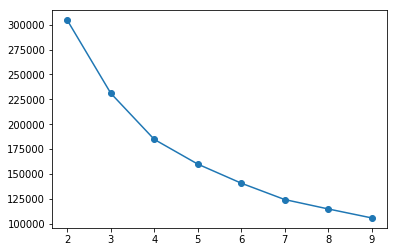

In [26]:
plt.plot(range(2,10),l,marker='o')

In [27]:
gm = GaussianMixture(n_components=5)

In [28]:
gm.fit(Xs)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=5, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [29]:
Xs['cl'] = df['cl'] = Xp['cl'] = gm.predict(Xs)

In [30]:
Xs.groupby('cl').mean()

Age    Height    Weight
cl                              
0   0.341485 -0.674078 -0.656193
1  -1.061824 -1.004651 -1.039212
2   0.278918  0.948713  2.060153
3   2.212055  0.161852  0.357855
4  -0.237509  0.669320  0.481448

In [31]:
Xs.cl.value_counts(normalize=True)

4    0.424112
0    0.272396
1    0.167858
3    0.076620
2    0.059014
Name: cl, dtype: float64

In [53]:
v='Sport'
aux = df[['cl',v,'Age']].copy()
aux=aux.pivot_table(index=v,columns='cl',aggfunc='count',values='Age',fill_value=0)

for c in range(5):
    aux[c]/=aux[c].sum()

aux.sort_values([4],ascending=False)

cl                            0         1         2         3         4
Sport                                                                  
Athletics              0.252742  0.142908  0.247306  0.099820  0.186558
Swimming               0.032900  0.199550  0.017890  0.005872  0.161905
Rowing                 0.018917  0.010721  0.029986  0.033117  0.083633
Cycling                0.050231  0.022192  0.015959  0.034369  0.060493
Canoeing               0.023431  0.010042  0.012706  0.036013  0.051201
Fencing                0.040938  0.016439  0.006607  0.070461  0.046010
Football               0.024136  0.017296  0.001830  0.005011  0.039334
Basketball             0.006430  0.001823  0.073287  0.010178  0.034992
Volleyball             0.007972  0.005611  0.027546  0.010491  0.033281
Handball               0.012376  0.003681  0.035170  0.019807  0.029066
Water Polo             0.004580  0.001680  0.039541  0.014092  0.026803
Sailing                0.024818  0.007290  0.035983  0.100525  0.026788
Hockey                 0.037767  0.014116  0.004472  0.017067  0.026760
Gymnastics             0.157388  0.335597  0.002846  0.006811  0.022885
Boxing                 0.029839  0.044456  0.016975  0.002505  0.022135
Shooting               0.039727  0.011900  0.058040  0.238159  0.021357
Wrestling              0.043250  0.018726  0.115369  0.018711  0.018726
Tennis                 0.011297  0.009863  0.002135  0.008690  0.015374
Judo                   0.024202  0.009756  0.082131  0.009551  0.015049
Equestrianism          0.032680  0.004824  0.001931  0.168715  0.010749
Modern Pentathlon      0.007972  0.002644  0.000508  0.005402  0.010594
Archery                0.012288  0.010078  0.013316  0.023644  0.008628
Badminton              0.012310  0.005396  0.000712  0.005011  0.008218
Baseball               0.000683  0.000071  0.015247  0.008690  0.007807
Table Tennis           0.017815  0.009720  0.001931  0.016128  0.006831
Diving                 0.015745  0.029840  0.000610  0.001253  0.006209
Weightlifting          0.023453  0.009577  0.119740  0.009708  0.004795
Beach Volleyball       0.002709  0.000036  0.004371  0.007281  0.003932
Taekwondo              0.003590  0.004253  0.003151  0.001331  0.003762
Triathlon              0.007091  0.001394  0.000305  0.002818  0.001782
Rugby Sevens           0.002136  0.000429  0.006810  0.001566  0.001429
Softball               0.005946  0.001179  0.002643  0.002114  0.001202
Synchronized Swimming  0.008192  0.015795  0.000407  0.000157  0.000410
Golf                   0.000683  0.000429  0.000610  0.002505  0.000382
Rugby                  0.000154  0.000000  0.000203  0.000157  0.000269
Trampolining           0.002048  0.001179  0.000000  0.000391  0.000255
Ice Hockey             0.000066  0.000000  0.000102  0.000078  0.000184
Tug-Of-War             0.000000  0.000000  0.000915  0.000157  0.000127
Rhythmic Gymnastics    0.001343  0.019512  0.000508  0.000000  0.000042
Art Competitions       0.000110  0.000000  0.000203  0.001566  0.000014
Motorboating           0.000000  0.000000  0.000000  0.000000  0.000014
Lacrosse               0.000022  0.000000  0.000000  0.000000  0.000014
Figure Skating         0.000022  0.000000  0.000000  0.000078  0.000000

In [40]:
aux = df[(df.cl==4)&(df.Sport=='Basketball')&(df.Year==1992)&(df.Medal=='Gold')].copy()

In [41]:
aux.head()

Name Sex   Age  Height  Weight  \
9105             Yelena Viktorovna Baranova   F  20.0   192.0    80.0   
19685  Elen Rafaelovna Bunatyants-Shakirova   F  22.0   190.0    86.0   
48356              Irina Yakovlevna Gerlits   F  26.0   190.0    72.0   
67406                Michael Jeffrey Jordan   M  29.0   198.0    90.0   
71864         Yelena Anatolyevna Khudashova   F  27.0   195.0    78.0   

                Team  Season       Sport Medal  Year  cl  
9105    Unified Team  Summer  Basketball  Gold  1992   4  
19685   Unified Team  Summer  Basketball  Gold  1992   4  
48356   Unified Team  Summer  Basketball  Gold  1992   4  
67406  United States  Summer  Basketball  Gold  1992   4  
71864   Unified Team  Summer  Basketball  Gold  1992   4

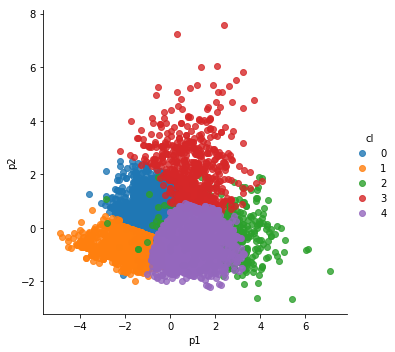

In [42]:
sns.lmplot(data=Xp.sample(frac=0.05),x='p1',y='p2',fit_reg=False,hue='cl')

In [43]:
from factor_analyzer import FactorAnalyzer

In [44]:
fa = FactorAnalyzer()

In [49]:
fa.analyze(data=Xs,n_factors=2,rotation='varimax')

In [50]:
fa.loadings

Factor1   Factor2
Age     0.043424  0.450328
Height  0.884772  0.224290
Weight  0.799454  0.391667
cl      0.761592 -0.124565

In [68]:
aux = df[(df.Sport=='Football')&(df.Year==2012)&(df.Sex=='M')&(df.Medal=='Gold')].copy()

In [69]:
aux

Name Sex   Age  Height  Weight    Team  \
5506     Javier Ignacio Aquino Carmona   M  22.0   165.0    62.0  Mexico   
28103      Jos de Jess Corona Rodrguez   M  30.0   188.0    83.0  Mexico   
28190            Javier Corts Granados   M  23.0   171.0    70.0  Mexico   
35951        Giovani dos Santos Ramrez   M  23.0   172.0    70.0  Mexico   
39531              Jorge Enrquez Garca   M  21.0   189.0    74.0  Mexico   
40674   Marco Jhonfai Fabin de la Mora   M  23.0   172.0    69.0  Mexico   
58141        Hctor Miguel Herrera Lpez   M  22.0   180.0    72.0  Mexico   
66216         Israel Sabdi Jimnez Naez   M  22.0   174.0    67.0  Mexico   
66231       Ral Alonso Jimnez Rodrguez   M  21.0   190.0    76.0  Mexico   
97098         Hiram Ricardo Mier Alans   M  22.0   179.0    70.0  Mexico   
113998           Oribe Peralta Morones   M  28.0   179.0    73.0  Mexico   
117673        Miguel ngel Ponce Briseo   M  23.0   176.0    82.0  Mexico   
122764     Diego Antonio Reyes Rosales   M  19.0   190.0    66.0  Mexico   
128367   Carlos Arnoldo Salcido Flores   M  32.0   175.0    70.0  Mexico   
155070    Nstor Vicente Vidrio Serrano   M  23.0   179.0    69.0  Mexico   

        Season     Sport Medal  Year  cl  
5506    Summer  Football  Gold  2012   0  
28103   Summer  Football  Gold  2012   4  
28190   Summer  Football  Gold  2012   4  
35951   Summer  Football  Gold  2012   4  
39531   Summer  Football  Gold  2012   4  
40674   Summer  Football  Gold  2012   4  
58141   Summer  Football  Gold  2012   4  
66216   Summer  Football  Gold  2012   4  
66231   Summer  Football  Gold  2012   4  
97098   Summer  Football  Gold  2012   4  
113998  Summer  Football  Gold  2012   4  
117673  Summer  Football  Gold  2012   4  
122764  Summer  Football  Gold  2012   4  
128367  Summer  Football  Gold  2012   0  
155070  Summer  Football  Gold  2012   4

In [66]:
aux.cl.value_counts(normalize=True)

0    0.46875
4    0.43750
3    0.09375
Name: cl, dtype: float64